<a href="https://colab.research.google.com/github/SaraPouyan/Building-a-ChatGPT-like-Model-from-Scratch/blob/main/3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='#FFE15D'><b>💎 Tokenization</b></font>

# 🔴 **Environment Setup**

## 🟠 `pip`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install -U -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6

In [6]:
!pip install -q datasets torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.8 MB/s eta 0:00:00


In [7]:
!pip install -q hazm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but

In [8]:
!pip install -q arabic_reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 12.8 MB/s eta 0:00:00


# 🔴 **Import**

In [1]:
from pprint import pprint
import random
from tqdm import tqdm
import numpy as np

import datasets
from datasets import load_dataset
from tokenizers import Tokenizer, models, pre_tokenizers, trainers, decoders

import torch
from torch.utils.data import Dataset, TensorDataset, random_split, DataLoader
import torch.nn as nn
from torch.nn import functional as F
from torch import optim

from torchmetrics.aggregation import MeanMetric

from hazm import Normalizer, WordTokenizer
from collections import Counter
import itertools

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [3]:
!python --version

Python 3.11.12


In [4]:
datasets.__version__

'3.6.0'

# 🔴 **Excercise**

## 🟣 **Train a Tokenizer for a Persian Dataset**

Train a Byte Pair Encoding (BPE) tokenizer on a Persian dataset from Hugging Face, and analyze the trained tokenizer

### 🟡 **Hugging Face's Persian-language dataset**
- **`farsi_news`** [🔗](https://huggingface.co/datasets/community-datasets/farsi_news)






In [ ]:
# farsi_news dataset
dataset = load_dataset("community-datasets/farsi_news")
dataset

DatasetDict({
    hamshahri: Dataset({
        features: ['title', 'summary', 'link', 'tags'],
        num_rows: 2203
    })
    radiofarda: Dataset({
        features: ['title', 'summary', 'link', 'tags'],
        num_rows: 284
    })
})

In [ ]:
def get_sample(dataset):
    idx = random.randint(0, len(dataset['hamshahri']))
    title = dataset['hamshahri'][idx]['title']
    summary = dataset['hamshahri'][idx]['summary']
    return (title, summary)

sample_title, sample_summary = get_sample(dataset)
print("Title:")
pprint(sample_title)
print("Summary:")
pprint(sample_summary)

Title:
'کیفیت هوای تهران سالم است'
Summary:
('کیفیت هوای پایتخت امروز چهارشنبه ۲۷ فروردین ماه با افزایش غلظت آلایندگی ذرات '
 'معلق کمتر از ۲.۵ میکرون با شاخص لحظه\u200cای ۸۰ در شرایط قابل قبول یا همان '
 'سالم است.')


- **`ByteLevel Pre-tokenizer`**
- **`ByteLevel decoder`**

In [ ]:
# Initialize a BPE tokenizer
tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))

# Use a ByteLevel pre-tokenizer to split text into words
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()

# Load a dataset
dataset = load_dataset("community-datasets/farsi_news", split="hamshahri")
texts = [
    f"{item['title']} {item['summary']}"
    for item in dataset
    if item['title'] and item['summary']
]

# Initialize a BPE trainer
trainer = trainers.BpeTrainer(
    vocab_size=8000,
    special_tokens=["[UNK]", "[PAD]"],
    min_frequency=2
    )

# Train the tokenizer on a dataset
tokenizer.train_from_iterator(texts, trainer)

# Add decoder
tokenizer.decoder = decoders.ByteLevel()

# Save the trained tokenizer
tokenizer.save("farsi_news_bpe_tokenizer.json")

In [ ]:
# Tokenize a sample text
sample_text = "سیستم تکامل هوشمند Smart Evolution سامسونگ ابعاد فنی مهندسی تلویزیون شما را بطور کامل عوض می‌کند بدون اینکه نیاز به تعویض کل دستگاه باشد."
encoding = tokenizer.encode(sample_text)

readable_tokens = []
for token in encoding.tokens:
    if token.startswith('[') and token.endswith(']'):
        readable_tokens.append(token)
    else:
        readable_tokens.append(decoders.ByteLevel().decode([token]))

decoded_text = tokenizer.decode(encoding.ids)

# Results
print("📝 Input text:\n", sample_text)
print("\n🔤 Tokens:\n", readable_tokens)
print("\n🧾 Decoded text:\n", decoded_text)

📝 Input text:
 سیستم تکامل هوشمند Smart Evolution سامسونگ ابعاد فنی مهندسی تلویزیون شما را بطور کامل عوض می‌کند بدون اینکه نیاز به تعویض کل دستگاه باشد.

🔤 Tokens:
 [' سیستم', ' تک', 'امل', ' هوشمند', ' S', 'm', 'ar', 't', ' ', 'E', 'v', 'o', 'l', 'u', 't', 'i', 'on', ' سام', 'س', 'ونگ', ' ابعاد', ' فنی', ' مهندسی', ' تلویزیون', ' شما', ' را', ' ب', 'طور', ' کامل', ' عو', 'ض', ' می', '\u200c', 'کند', ' بدون', ' اینکه', ' نیاز', ' به', ' تعویض', ' کل', ' دستگاه', ' باشد', '.']

🧾 Decoded text:
  سیستم تکامل هوشمند Smart Evolution سامسونگ ابعاد فنی مهندسی تلویزیون شما را بطور کامل عوض می‌کند بدون اینکه نیاز به تعویض کل دستگاه باشد.


- **`DeepSentiPers`** [🔗](https://huggingface.co/datasets/PartAI/DeepSentiPers)

In [ ]:
# DeepSentiPers dataset
dataset = load_dataset("PartAI/DeepSentiPers")
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'label'],
        num_rows: 6320
    })
    dev: Dataset({
        features: ['review', 'label'],
        num_rows: 703
    })
    test: Dataset({
        features: ['review', 'label'],
        num_rows: 1854
    })
})

In [ ]:
def get_sample(dataset):
    idx = random.randint(0, len(dataset['train']))
    return dataset['train'][idx]['review']

sample = get_sample(dataset)
pprint(sample)

('این دوربین با وزن تنها 167 گرم، آن قدر کوچک سبک است که می توان آن را برای '
 'پژوهش های علمی رفتار حیوانات بر روی بدن یک حیوان یا برای فیلم برداری هوایی '
 'بر روی یک هلیکوپتر کنترل از راه دور یا یک بالون هم نصب کرد!')


In [ ]:
dataset = load_dataset("PartAI/DeepSentiPers")
texts = [sample["review"] for sample in dataset["train"]]
len(texts)

6320

- **`Metaspace pre-tokenizer`**
- **`Metaspace decoder`**

In [ ]:
# Initialize a BPE tokenizer
tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))

# Use a Metaspace pre-tokenizer to split text into words
tokenizer.pre_tokenizer = pre_tokenizers.Metaspace()


# Load a dataset
dataset = load_dataset("PartAI/DeepSentiPers")
texts = [sample["review"] for sample in dataset["train"]]

# Initialize a BPE trainer
trainer = trainers.BpeTrainer(
    vocab_size=8000,
    special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"]
)

# Train the tokenizer on a dataset
tokenizer.train_from_iterator(texts, trainer)

# Add decoder
tokenizer.decoder = decoders.Metaspace()

# Save the trained tokenizer
tokenizer.save("persian_text_sentiment_bpe_tokenizer.json")

In [ ]:
#tokenizer = Tokenizer.from_file("persian_text_sentiment_bpe_tokenizer.json")

examples = [
    "سیستم تکامل هوشمند Smart Evolution سامسونگ ابعاد فنی مهندسی تلویزیون شما را بطور کامل عوض می‌کند بدون اینکه نیاز به تعویض کل دستگاه باشد.",
    "اصلاً راضی نبودم، بسته‌بندی خراب بود و کالا اشتباه ارسال شد.",
    "خیلی خوبه، ولی کاش باتریش بیشتر دوام می‌آورد.",
    "گوشی a24 که از محبوب‌ترین گوشی 2023 سامسونگ می‌باشد، مجهز به صفحه نمایش 6.5 اینچی با رزولوشن 1080x2340 پیکسل است.",
]

for text in examples:
    output = tokenizer.encode(text)
    print("\n📝 Input text:\n", text)
    print("\n🔤 Tokens:\n", output.tokens)
    print("\n🧾 Decoded text:\n", tokenizer.decode(output.ids))
    print(60*"----")


📝 Input text:
 سیستم تکامل هوشمند Smart Evolution سامسونگ ابعاد فنی مهندسی تلویزیون شما را بطور کامل عوض می‌کند بدون اینکه نیاز به تعویض کل دستگاه باشد.

🔤 Tokens:
 ['▁سیستم', '▁تکامل', '▁هوشمند', '▁Smart', '▁Evolution', '▁سامسونگ', '▁ابعاد', '▁فنی', '▁مهندسی', '▁تلویزیون', '▁شما', '▁را', '▁بطور', '▁کامل', '▁عوض', '▁می\u200cکند', '▁بدون', '▁اینکه', '▁نیاز', '▁به', '▁تعویض', '▁کل', '▁دستگاه', '▁باشد.']

🧾 Decoded text:
 سیستم تکامل هوشمند Smart Evolution سامسونگ ابعاد فنی مهندسی تلویزیون شما را بطور کامل عوض می‌کند بدون اینکه نیاز به تعویض کل دستگاه باشد.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

📝 Input text:
 اصلاً راضی نبودم، بسته‌بندی خراب بود و کالا اشتباه ارسال شد.

🔤 Tokens:
 ['▁اصلاً', '▁راضی', '▁نبود', 'م،', '▁بسته', '\u200cبندی', '▁خراب', '▁بود', '▁و', '▁کالا', '▁اشتباه', '▁ارسال

## 🟣 **Word2Vec from Scratch**  

### 🟡 Step 1: Load and Preprocess the Dataset
- **` Persian News Summary (pn_summary) Dataset`** [🔗](https://huggingface.co/datasets/HooshvareLab/pn_summary)

In [3]:
dataset = load_dataset("HooshvareLab/pn_summary")
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'article', 'summary', 'category', 'categories', 'network', 'link'],
        num_rows: 82022
    })
    validation: Dataset({
        features: ['id', 'title', 'article', 'summary', 'category', 'categories', 'network', 'link'],
        num_rows: 5592
    })
    test: Dataset({
        features: ['id', 'title', 'article', 'summary', 'category', 'categories', 'network', 'link'],
        num_rows: 5593
    })
})

In [13]:
dataset['train'][0]

{'id': '738e296491f8b24c5aa63e9829fd249fb4428a66',
 'title': 'مدیریت فروش نفت در دوران تحریم هوشمندانه عمل کرد',
 'article': 'به گزارش شانا، علی کاردر امروز (۲۷ دی ماه) در مراسم تودیع محسن قمصری، مدیر سابق امور بین الملل شرکت ملی نفت ایران و معارفه سعید خوشرو، مدیر جدید امور بین الملل این شرکت، گفت: مدیریت امور بین\u200eالملل به عنوان یکی از تاثیرگذارترین مدیریت\u200cهای شرکت ملی نفت ایران در دوران تحریم\u200cهای ظالمانه غرب علیه کشورمان بسیار هوشمندانه عمل کرد و ما توانستیم به خوبی از عهده تحریم\u200cها برآییم. [n] وی افزود: مجموعه امور بین الملل در همه دوران\u200cها با سختی\u200cها و مشکلات بسیاری مواجه بوده است، به ویژه در دوره اخیر به دلیل مسائل پیرامون تحریم وظیفه سنگینی بر عهده داشت که با تدبیر مدیریت خوب این مجموعه سربلند از آن بیرون آمد. [n] کاردر با قدردانی از زحمات محسن قمصری، به سلامت مدیریت امور بین الملل این شرکت اشاره کرد و افزود: محوریت کار مدیریت اموربین الملل سلامت مالی بوده است. [n] وی بر ضرورت نهادینه سازی جوانگرایی در مدیریت شرکت ملی نفت ایران تاکید کرد و گفت: مدیری

In [ ]:
def get_sample(dataset):
    idx = random.randint(0, len(dataset['train']))
    return dataset['train'][idx]['article']

sample = get_sample(dataset)
pprint(sample)

('به گزارش روز سه شنبه ایرنا به نقل از تارنمای خبری این کمیساریا، نهاد مزبور '
 'با صدور بیانیه\u200cای اعلام کرد که اولین گروه کودکان از حدود ۱۰ هزار کودکی '
 'که درخواست تابعیت شان تاکنون پذیرفته شده است، ماه گذشته اسناد هویتی ایران '
 'موسوم به شناسنامه را دریافت کردند. [n] این بیانیهادآور شد که طبق اعلام دولت '
 'ایران، تقریبا ۷۵ هزار کودک در معرض خطر فاقد ملیت، واجد شرایط برخورداری از حق '
 'تابعیت ایران به موجب قانون جدید ملیت هستند؛ قانونی که در سال ۲۰۱۹میلادی '
 'اصلاح شد تا به کودکان زیر ۱۸ سال امکان درخواست اسناد هویتی اعطا کند. [n] در '
 'جریان شیوع کرونا در ایران، کمیساریای عالی پناهندگان سازمان ملل به ارائه '
 'مشاوره\u200cهای حقوقی رایگان و از راه دور و کمک به والدین کودکانی که از '
 'مادران ایرانی و پدران خارجی متولد شده\u200cاند، ادامه داد تا به آنها در '
 'زمینه فرآیند درخواست حق شهروندی یاری رساند. [n] این بیانیه در ادامه حاکی '
 'است: این قانون با فراهم کردن حق اعطای ملیت مادران به فرزندانشان، گامی به سوی '
 'کاهش شکاف جنسیتی در ایران برمی دارد، کشوری که تابعیت عمدتا

In [4]:
n = 30000
subset = dataset["train"].select(range(n))
train_texts = [sample["article"] for sample in subset]

### 🟡 Step 2: Tokenization

In [5]:
class SimpleTokenizer:
    def __init__(self, texts, min_freq=5, vocab_size=10000):
        self.normalizer = Normalizer()
        self.tokenizer = WordTokenizer()
        self.min_freq = min_freq
        self.vocab_size = vocab_size
        self.pad_token = "<PAD>"
        self.unk_token = "<UNK>"
        self._build_vocab(texts)

    def _normalize_and_tokenize(self, text):
        text = self.normalizer.normalize(text)
        return self.tokenizer.tokenize(text)

    def _build_vocab(self, texts):
        all_tokens = itertools.chain.from_iterable(
            self._normalize_and_tokenize(text) for text in texts
        )

        token_freq = Counter(all_tokens)

        token_freq = {token: freq for token, freq in token_freq.items() if freq >= self.min_freq}

        # Keep top-K frequent tokens
        most_common = sorted(token_freq.items(), key=lambda x: -x[1])[:self.vocab_size - 2]

        # token → id
        self.token_to_id_map = {
            self.pad_token: 0,
            self.unk_token: 1
        }
        self.token_to_id_map.update({
            token: idx + 2 for idx, (token, _) in enumerate(most_common)
        })

        # id → token
        self.id_to_token_map = {idx: token for token, idx in self.token_to_id_map.items()}

    def get_vocab(self):
        return self.token_to_id_map

    def get_vocab_size(self):
        return len(self.token_to_id_map)

    def token_to_id(self, token):
        return self.token_to_id_map.get(token, self.token_to_id_map[self.unk_token])

    def id_to_token(self, idx):
        return self.id_to_token_map.get(idx, self.unk_token)

    def encode(self, text):
        tokens = self._normalize_and_tokenize(text)
        return [self.token_to_id(token) for token in tokens]

    def decode(self, ids):
        return [self.id_to_token(idx) for idx in ids]


In [6]:
tokenizer = SimpleTokenizer(train_texts)
tokenized_data = [tokenizer.encode(sample) for sample in train_texts]

### 🟡 Step 3: Prepare Training Data (Skip-Gram)

In [7]:
def generate_skip_gram_pairs(tokenized_data, window_size=2):
    skip_gram_pairs = []

    for tokens in tokenized_data:
        for i, target_token in enumerate(tokens):
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            for j in range(start, end):
                if i != j:
                    skip_gram_pairs.append((target_token, tokens[j]))

    return torch.tensor(skip_gram_pairs, dtype=torch.long)

In [8]:
skip_gram_pairs = generate_skip_gram_pairs(tokenized_data, window_size=2)
print(skip_gram_pairs.shape)

torch.Size([42324788, 2])


In [13]:
skip_gram_pairs[:5]

tensor([[  5,  30],
        [  5, 171],
        [ 30,   5],
        [ 30, 171],
        [ 30,   4]])

In [11]:
sample = "امروز هوا خیلی گرم بود"
token_id_sample = tokenizer.encode(sample)
tensor_pairs = generate_skip_gram_pairs([token_id_sample], window_size=2)

In [12]:
# print each pair using the tokenizer
for pair in tensor_pairs:
    token1 = tokenizer.id_to_token(pair[0].item())
    token2 = tokenizer.id_to_token(pair[1].item())
    print(f"{token1}, {token2}")

امروز, هوا
امروز, خیلی
هوا, امروز
هوا, خیلی
هوا, گرم
خیلی, امروز
خیلی, هوا
خیلی, گرم
خیلی, بود
گرم, هوا
گرم, خیلی
گرم, بود
بود, خیلی
بود, گرم


In [14]:
train_set = TensorDataset(skip_gram_pairs[:, 0], skip_gram_pairs[:, 1])
train_set, valid_set = random_split(train_set, [0.8, 0.2])

len(train_set), len(valid_set)

(33859831, 8464957)

In [15]:
train_loader = DataLoader(train_set, batch_size=218, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=218, shuffle=False)

len(train_loader), len(valid_loader)

(155321, 38831)

### 🟡 Step 4: Define Word2Vec Model

In [16]:
class SkipGram(nn.Module):

    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, target_word):
        embedded = self.embeddings(target_word)
        output = self.linear(embedded)
        return output

### 🟡 Step 5: Config

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
embedding_dim = 100  # Size of the word embeddings
learning_rate = 1e-3
num_epochs = 5
vocab_size = tokenizer.get_vocab_size()

# Initialize model, loss, and optimizer
model = SkipGram(vocab_size, embedding_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

sum([param.numel() for param in model.parameters()]) / 1e6

2.01

### 🟡 Step 6: Train and Evaluate Model

In [18]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, epoch=None):
    model.train()
    loss_train = MeanMetric().to(device)

    with tqdm(train_loader, unit="batch") as tepoch:
        for inputs, targets in tepoch:
            if epoch is not None:
                tepoch.set_description(f"Epoch {epoch}")

            inputs = inputs.to(device)
            targets = targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()

            loss_train.update(loss.item())
            tepoch.set_postfix(loss=loss_train.compute().item())

    return model, loss_train.compute().item()

In [19]:
def evaluate(model, valid_loader, loss_fn):
    model.eval()
    loss_eval = MeanMetric().to(device)

    with torch.no_grad():
       for inputs, targets in valid_loader:
          inputs = inputs.to(device)
          targets = targets.to(device)

          outputs = model(inputs)
          loss = loss_fn(outputs, targets)

          loss_eval.update(loss.item())

    return loss_eval.compute().item()

### 🟠 **Training Process**

In [20]:
loss_train_hist = []
loss_valid_hist = []

best_loss_valid = torch.inf
epoch_counter = 0

In [21]:
torch.manual_seed(127)
num_epochs = 4

for epoch in range(0, num_epochs):
    # Train
    model, loss_train = train_one_epoch(model, train_loader, criterion, optimizer, epoch)

    # Validation
    loss_valid = evaluate(model, valid_loader, criterion)
    print(f'Valid: Loss = {loss_valid:.4}')

    loss_train_hist.append(loss_train)
    loss_valid_hist.append(loss_valid)

    if loss_valid < best_loss_valid:
        torch.save(model.state_dict(), f'best_model_word2vec.pt')
        best_loss_valid = loss_valid
        print(f'Model Saved!')
        print('')

    epoch_counter += 1

Epoch 0: 100%|██████████| 155321/155321 [19:54<00:00, 130.00batch/s, loss=6.06]


Valid: Loss = 5.949
Model Saved!



Epoch 1: 100%|██████████| 155321/155321 [19:43<00:00, 131.23batch/s, loss=5.92]


Valid: Loss = 5.913
Model Saved!



Epoch 2: 100%|██████████| 155321/155321 [19:38<00:00, 131.77batch/s, loss=5.89]


Valid: Loss = 5.899
Model Saved!



Epoch 3: 100%|██████████| 155321/155321 [19:41<00:00, 131.41batch/s, loss=5.88]


Valid: Loss = 5.892
Model Saved!



### 🟡 Step 7: Extract Word Embeddings


In [24]:
# Get the embeddings for all tokens
embeddings = model.embeddings.weight.data
vocab = tokenizer.get_vocab()

# Example: Get the embedding for a specific token
token = "ایران"
if token in vocab:
    token_id = vocab[token]
    token_embedding = embeddings[token_id]
    print(f"Embedding for '{token}': {token_embedding}")
else:
    print(f"'{token}' not in vocabulary")

Embedding for 'ایران': tensor([ 0.0355, -0.3197, -0.0408, -0.3228,  0.3374, -0.0898, -0.7029,  0.1355,
         0.2335, -0.0043, -0.4379, -0.1692,  0.4751, -0.6967,  0.1361,  0.0282,
         0.5206, -0.6803, -0.4771,  0.3536, -0.4863,  0.3999,  0.2022,  0.0989,
        -0.0200,  0.2289, -0.6023, -0.4619,  0.0511, -0.2861,  0.8477, -0.2850,
         0.1275,  0.0087, -0.1174,  0.5486, -0.6020, -0.1354, -0.5554, -0.6419,
         0.5016,  0.3867,  0.4975,  0.4335, -0.0877, -0.6241,  0.5211,  0.8865,
         0.2334, -0.4336,  0.3303,  0.1732,  0.5323,  0.3059,  0.2639, -0.2514,
        -0.1912, -0.2433,  0.0469,  0.2124,  0.1889, -0.5764,  0.1620, -0.2389,
        -0.4607,  0.5167,  0.7099,  0.1677, -0.0067,  0.2019, -0.3547,  0.0130,
        -0.0620, -0.2969, -0.5021,  0.4550, -0.5999, -0.7382, -0.5347,  0.4190,
        -0.5409,  0.3658,  0.0093, -0.2822,  0.1940,  1.4759,  0.0624, -0.5643,
         0.3560, -0.5955, -0.5866,  0.5502, -0.3693,  0.3117, -0.5144, -0.5192,
        -0.7034, 

### 🟡 Step 8: Save the Model and Tokenizer

In [26]:
# Save the model
torch.save(model.state_dict(), "skipgram_word2vec.pt")

# Save the embeddings
torch.save(embeddings, "word_embeddings.pt")

### 🟡 Step 9: Visualize Embeddings with t-SNE







In [27]:
def plot_embeddings(embeddings, tokenizer, num_words=200):
    from matplotlib import rcParams
    rcParams['font.family'] = 'DejaVu Sans'

    selected_embeddings = embeddings[:num_words].cpu().numpy()
    tokens = list(tokenizer.get_vocab().keys())[:num_words]


    tsne = TSNE(n_components=2, random_state=42, init='pca', perplexity=30)
    reduced_vectors = tsne.fit_transform(selected_embeddings)

    plt.figure(figsize=(14, 10))
    for i, label in enumerate(tokens):
        reshaped = arabic_reshaper.reshape(label)
        bidi_label = get_display(reshaped)
        x, y = reduced_vectors[i, 0], reduced_vectors[i, 1]
        plt.scatter(x, y, label=bidi_label, alpha=0.7)
        plt.annotate(bidi_label, (x, y))
    plt.title("t-SNE visualization of Persian Word Embeddings")
    plt.grid(True)
    plt.show()

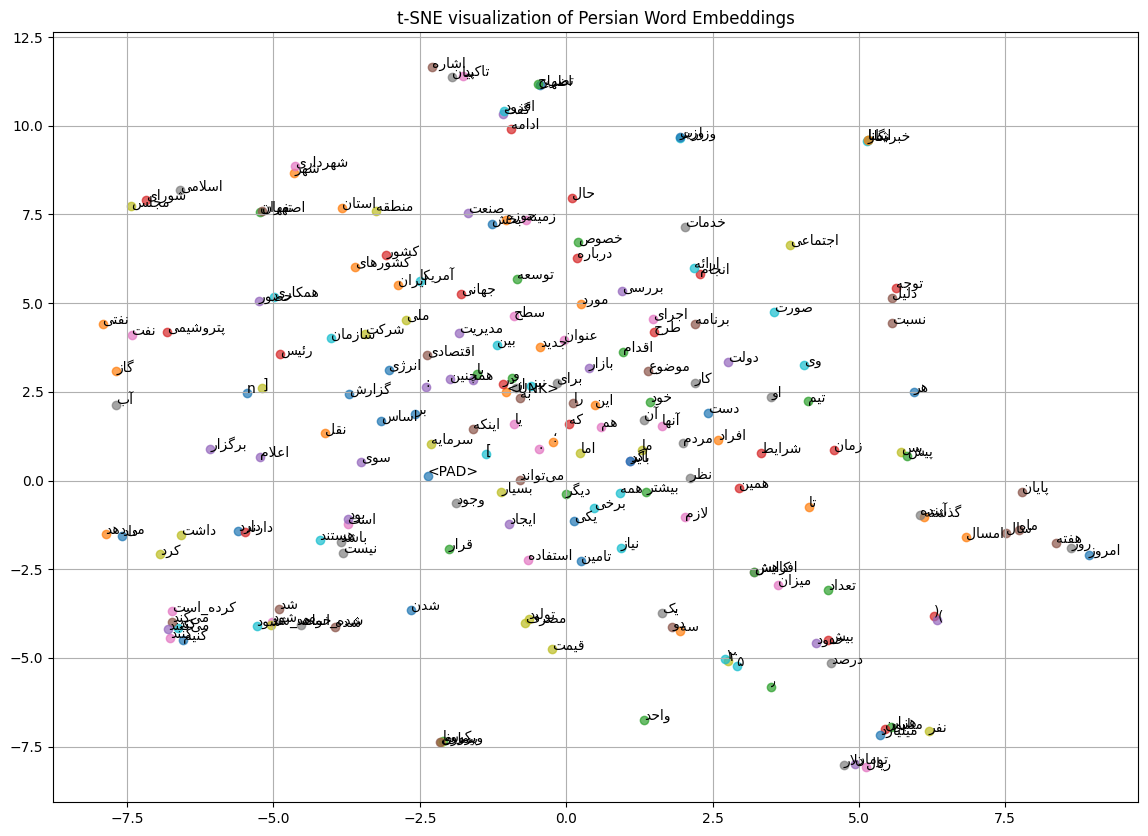

In [28]:
plot_embeddings(model.embeddings.weight.data, tokenizer, num_words=200)

### 🟡 Step 10: Find similar words

In [29]:
trained_embeddings = model.embeddings.weight.data

def get_similar_words(word, top_k=5):
    if word in tokenizer.get_vocab():
        word_id = tokenizer.encode(word)[0]
        word_embedding = trained_embeddings[word_id].unsqueeze(0)

        # Compute cosine similarity with all embeddings
        similarities = F.cosine_similarity(word_embedding, trained_embeddings)

        # Get top-k+1 to exclude the word itself
        top_k_ids = torch.topk(similarities, top_k + 1).indices.tolist()

        # Extract words and similarities
        similar_words_with_scores = []
        for idx in top_k_ids:
            if idx != word_id:
                token = tokenizer.decode([idx])
                score = similarities[idx].item()
                similar_words_with_scores.append((token, round(score, 4)))
            if len(similar_words_with_scores) == top_k:
                break

        print(f"کلمات مشابه با '{word}': {similar_words_with_scores}")
    else:
        print(f"کلمه «{word}» در فهرست واژگان وجود ندارد. ☹️")


In [30]:
# Example usage
get_similar_words("ایران")

کلمات مشابه با 'ایران': [(['کشورمان'], 0.6861), (['چین'], 0.5321), (['ترکیه'], 0.4972), (['کشورش'], 0.4473), (['اروپا'], 0.4351)]


In [31]:
get_similar_words("گزارش")

کلمات مشابه با 'گزارش': [(['خبرگزاری'], 0.5501), (['خبرنگار'], 0.5247), (['گفته'], 0.5242), (['به\u200cگزارش'], 0.5232), (['ایرنا'], 0.4945)]


In [32]:
get_similar_words("معلم")

کلمات مشابه با 'معلم': [(['دانش\u200cآموز'], 0.6352), (['تعلیم'], 0.6021), (['تحصیل'], 0.5495), (['آموزان'], 0.5452), (['مدرسه'], 0.5451)]


In [33]:
get_similar_words("تهران")

کلمات مشابه با 'تهران': [(['اصفهان'], 0.7897), (['مشهد'], 0.6999), (['قزوین'], 0.6613), (['شیراز'], 0.6467), (['سمنان'], 0.6235)]


In [34]:
get_similar_words("شب")

کلمات مشابه با 'شب': [(['بامداد'], 0.6236), (['روز'], 0.6233), (['فردا'], 0.5917), (['بعدازظهر'], 0.5867), (['صبح'], 0.5851)]


In [35]:
get_similar_words("پویان")

کلمه «پویان» در فهرست واژگان وجود ندارد. ☹️


### 🟡 Step 11: Analogy Task (word_a - word_b + word_c ≈ ?)

In [36]:
def analogy(word_a, word_b, word_c, top_k=3):
    vocab = tokenizer.get_vocab()

    for word in [word_a, word_b, word_c]:
        if word not in vocab:
            print(f"کلمه «{word}» در واژگان وجود ندارد.")
            return []

    embedding_weights = model.embeddings.weight.data

    id_a = torch.tensor(tokenizer.token_to_id(word_a))
    id_b = torch.tensor(tokenizer.token_to_id(word_b))
    id_c = torch.tensor(tokenizer.token_to_id(word_c))

    vec_a = embedding_weights[id_a]
    vec_b = embedding_weights[id_b]
    vec_c = embedding_weights[id_c]

    target_vec = vec_a - vec_b + vec_c

    similarities = F.cosine_similarity(target_vec.unsqueeze(0), embedding_weights)

    exclude_ids = {id_a.item(), id_b.item(), id_c.item()}
    top_ids = [i for i in torch.topk(similarities, top_k + 3).indices.tolist() if i not in exclude_ids][:top_k]

    result = [tokenizer.id_to_token(i) for i in top_ids]
    print(f"Analogies → '{word_a}' - '{word_b}' + '{word_c}' ≈ ")
    return result

In [ ]:
analogy("دلار", "آمریکا", "ایران")

Analogies → 'دلار' - 'آمریکا' + 'ایران' ≈ 


['تومان', 'تومانی', 'یورو']

In [38]:
analogy("پول", "بانک", "بورس")

Analogies → 'پول' - 'بانک' + 'بورس' ≈ 


['فرابورس', 'مزایده', 'سهام']

In [39]:
analogy("بشکه", "نفت", "گاز")

Analogies → 'بشکه' - 'نفت' + 'گاز' ≈ 


['مترمکعب', 'لیتر', 'تن']